## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

# from imports import *
import torch
import matplotlib.pyplot as plt
import numpy as np
from algorithms import *
from Utilities import display_results
import sys
sys.path.append('problems/')
sys.path.append('denoisers/')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from problems.CSMRI import CSMRI
from denoisers.BM3D import BM3DDenoiser

# Figures 1: Compare Image Fidelity for Different Algorithms 

In [3]:
im_height, im_width = 128, 128  # Image dimensions
samp_rate = 0.5                 # Pick a number 0 < SR <= 1
# sigma_true = 5.0                # Select std dev of AWGN
snr = 10.

main_problem = CSMRI('./data/13.png', H=im_height, W=im_width, sample_prob=samp_rate, snr=snr)

0.13111364602687364
0.0 1.0


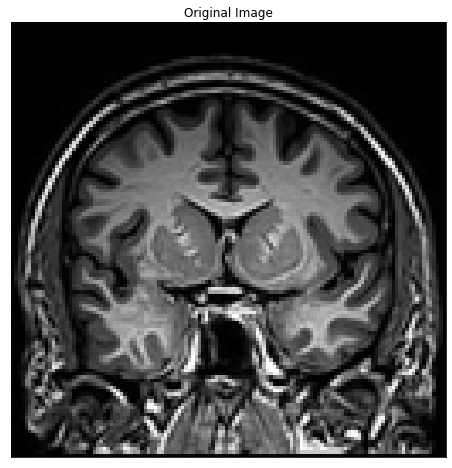

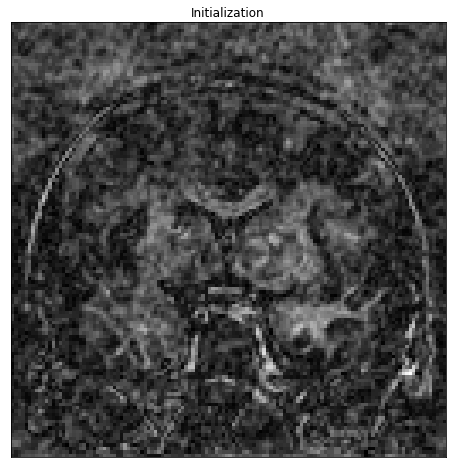

In [4]:
main_problem.display(show_measurements=False, save_results=True)
print(main_problem.sigma)
print(main_problem.Xinit.min(), main_problem.Xinit.max())

In [29]:
denoiser = BM3DDenoiser(sigma_modifier=0.7)
results_svrg = pnp_svrg(main_problem, denoiser=denoiser, eta=1e-1, tt=60, T2=10, mini_batch_size=500, verbose=True)

0 0 Before denoising:  13.788311621551637
After denoising update: 0 0 13.905109127019298
0 1 Before denoising:  14.426522777539475
After denoising update: 0 1 14.462939059857877
0 2 Before denoising:  14.312586597065946
After denoising update: 0 2 14.326800556531872
0 3 Before denoising:  14.826504789816088
After denoising update: 0 3 14.83866631343031
0 4 Before denoising:  15.301108025772104
After denoising update: 0 4 15.309070297328855
0 5 Before denoising:  15.790014959904743
After denoising update: 0 5 15.798380433994017
0 6 Before denoising:  15.619223589877027
After denoising update: 0 6 15.623476558695842
0 7 Before denoising:  16.02358823370235
After denoising update: 0 7 16.02888023581087
0 8 Before denoising:  16.40087669200011
After denoising update: 0 8 16.414630151382624
0 9 Before denoising:  16.682722985818558
After denoising update: 0 9 16.69200418021343
1 0 Before denoising:  17.063796557106162
After denoising update: 1 0 17.046583914669068
1 1 Before denoising:  17.

Output PSNR: 22.9	Change in PSNR: 3.93	Gradient Time: 55.95	Denoising Time: 55.95


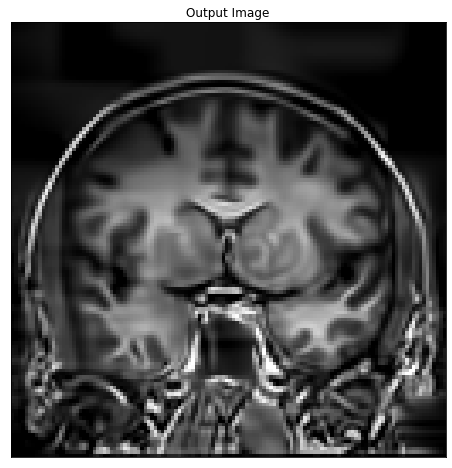

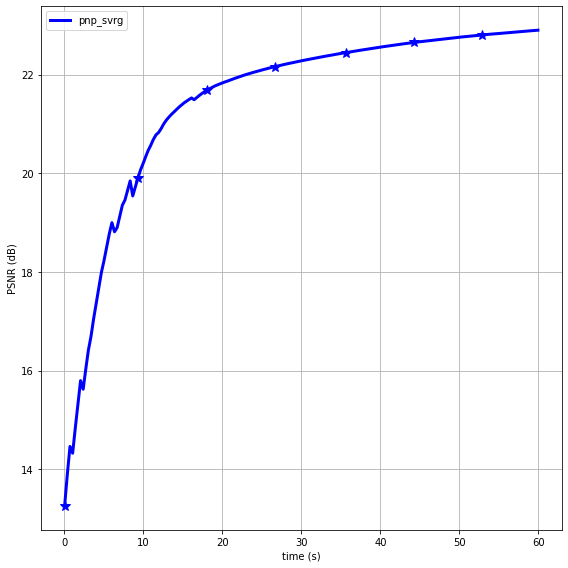

In [30]:
master_psnr_fig = display_results(main_problem, results_svrg, save_results=True)

In [9]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_sgd = pnp_sgd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=1000, verbose=True)

0 Before denoising:  13.413428404722405
0 After denoising:  13.507803053068521
1 Before denoising:  13.658385573575458
1 After denoising:  13.698660886006255
2 Before denoising:  13.86161262535171
2 After denoising:  13.88493114753006
3 Before denoising:  14.006935177210568
3 After denoising:  14.021759771267137
4 Before denoising:  15.361178070026941
4 After denoising:  15.373183100789184
5 Before denoising:  15.495507650045992
5 After denoising:  15.503463934173842
6 Before denoising:  15.769823741264906
6 After denoising:  15.774133734759177
7 Before denoising:  16.557467426954087
7 After denoising:  16.56001287333171
8 Before denoising:  16.737718346544515
8 After denoising:  16.738040793124032
9 Before denoising:  16.864206594404678
9 After denoising:  16.862388763172863
10 Before denoising:  17.01587732704223
10 After denoising:  17.01388938249899
11 Before denoising:  17.892935152109978
11 After denoising:  17.888541012495914
12 Before denoising:  18.430908309860342
12 After den

Output PSNR: 23.0	Change in PSNR: 3.96	Gradient Time: 55.95	Denoising Time: 55.95


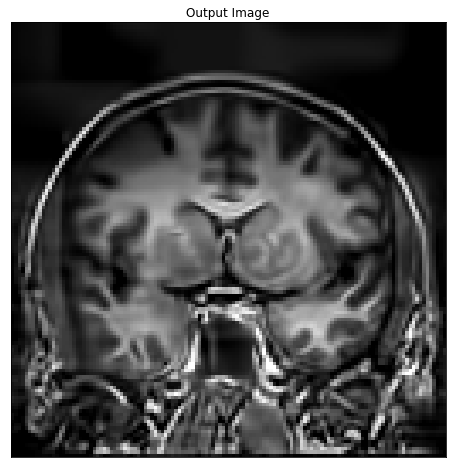

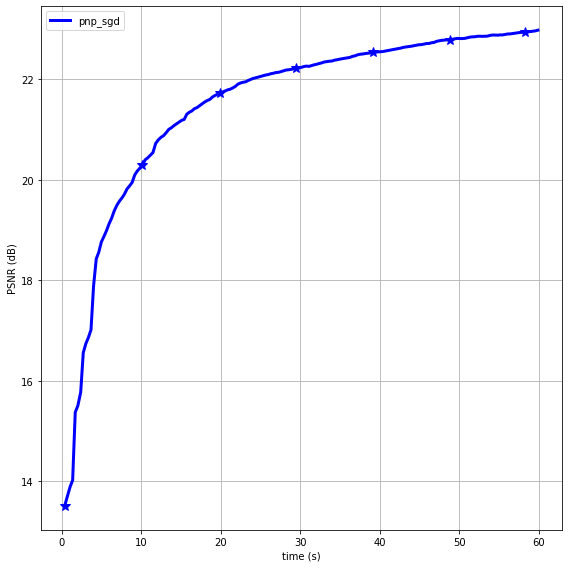

In [10]:
master_psnr_fig = display_results(main_problem, results_sgd, save_results=True)

In [11]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_gd = pnp_gd(main_problem, denoiser=denoiser, eta=1e-1, tt=60, verbose=True)

0 Before denoising:  13.788311621551637
0 After denoising:  13.873893070765488
1 Before denoising:  14.381852225379033
1 After denoising:  14.415583048090568
2 Before denoising:  14.89910732131396
2 After denoising:  14.914873463838791
3 Before denoising:  15.374081994185637
3 After denoising:  15.380252778529195
4 Before denoising:  15.815491515525633
4 After denoising:  15.815126455980957
5 Before denoising:  16.22692979129894
5 After denoising:  16.221284260708213
6 Before denoising:  16.61030280092007
6 After denoising:  16.60150765653453
7 Before denoising:  16.968549199791507
7 After denoising:  16.956966000743844
8 Before denoising:  17.30294559875641
8 After denoising:  17.288782236574924
9 Before denoising:  17.614756837688468
9 After denoising:  17.597946334603932
10 Before denoising:  17.905068138504912
10 After denoising:  17.8859219291784
11 Before denoising:  18.175332785456465
11 After denoising:  18.153972505459116
12 Before denoising:  18.42684180539782
12 After denois

Output PSNR: 23.1	Change in PSNR: 0.22	Gradient Time: 59.62	Denoising Time: 59.62


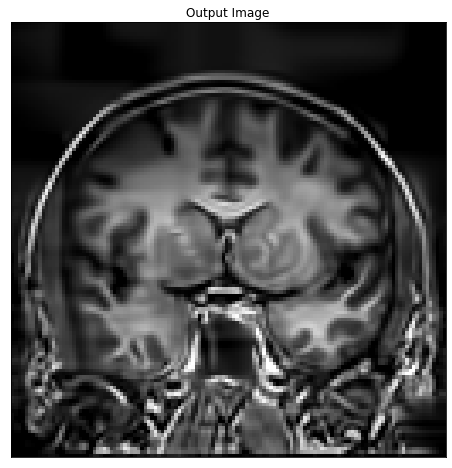

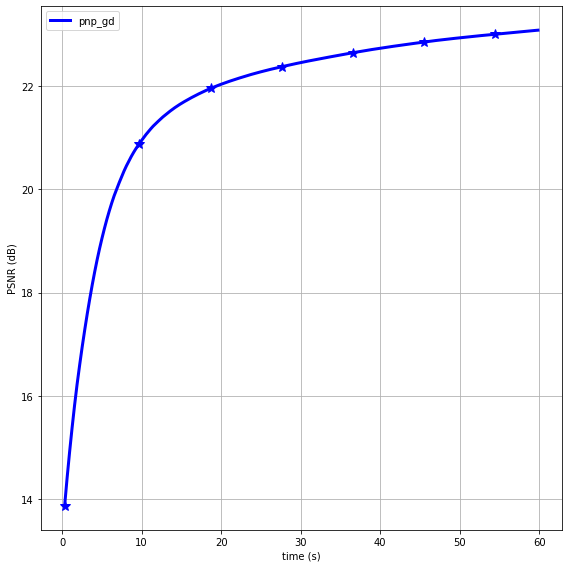

In [12]:
master_psnr_fig = display_results(main_problem, results_gd, save_results=True)

In [13]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_saga = pnp_saga(main_problem, denoiser=denoiser, eta=1e-1, tt=60, mini_batch_size=5000, hist_size=10, verbose=True)

0 Before denoising:  13.732623529439818
0 After denoising:  13.822914972198092
1 Before denoising:  14.362895123611786
1 After denoising:  14.399411384333378
2 Before denoising:  14.705567050754336
2 After denoising:  14.7232756394196
3 Before denoising:  14.898777261815642
3 After denoising:  14.908469635536951
4 Before denoising:  15.143327455659144
4 After denoising:  15.148103287692233
5 Before denoising:  15.352201703847816
5 After denoising:  15.35415851693664
6 Before denoising:  15.71046771745033
6 After denoising:  15.710903571161822
7 Before denoising:  16.200426738691633
7 After denoising:  16.198573097700336
8 Before denoising:  16.049355180372164
8 After denoising:  16.045330766891496
9 Before denoising:  16.647893176178787
9 After denoising:  16.641009965343684
10 Before denoising:  17.003286033698256
10 After denoising:  16.994747214697966
11 Before denoising:  17.096678968227064
11 After denoising:  17.08712348722611
12 Before denoising:  17.336422610217866
12 After den

Output PSNR: 22.9	Change in PSNR: 15.94	Gradient Time: 44.14	Denoising Time: 44.14


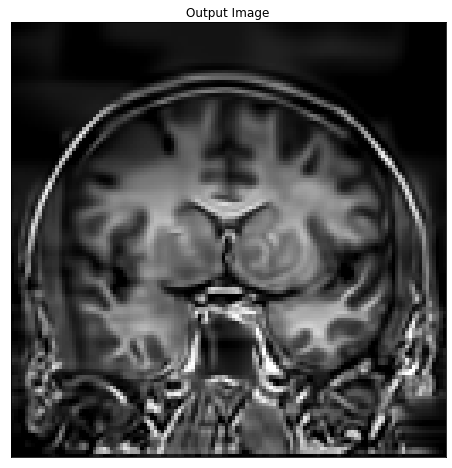

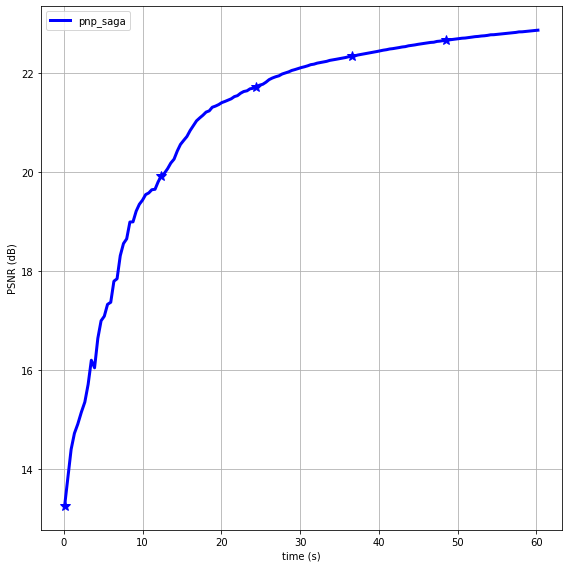

In [14]:
master_psnr_fig = display_results(main_problem, results_saga, save_results=True)

In [15]:
denoiser = BM3DDenoiser(sigma_modifier=0.6)
results_sarah = pnp_sarah(main_problem, denoiser=denoiser, eta=5e-2, tt=60, T2=10, mini_batch_size=1000, verbose=True)

After gradient update: 0 0 13.51064217990161
After denoising update: 0 0 13.60044204641013
After gradient update: 0 1 13.862069029490062
After denoising update: 0 1 13.899042020066334
After gradient update: 0 2 14.1700069008217
After denoising update: 0 2 14.190281815396627
After gradient update: 0 3 14.474811467231767
After denoising update: 0 3 14.486044447313644
After gradient update: 0 4 14.789026417362445
After denoising update: 0 4 14.794802783436669
After gradient update: 0 5 15.11301477528274
After denoising update: 0 5 15.115547668363202
After gradient update: 0 6 15.46281144914831
After denoising update: 0 6 15.46511830057973
After gradient update: 0 7 15.809540736739807
After denoising update: 0 7 15.814789468065264
After gradient update: 0 8 16.103030075679218
After denoising update: 0 8 16.11686780299223
After gradient update: 0 9 16.561675307079746
After denoising update: 0 9 16.594797328020164
After gradient update: 1 0 16.773677218861145
After denoising update: 1 0 16.7

Output PSNR: 22.1	Change in PSNR: 6.82	Gradient Time: 53.08	Denoising Time: 53.08


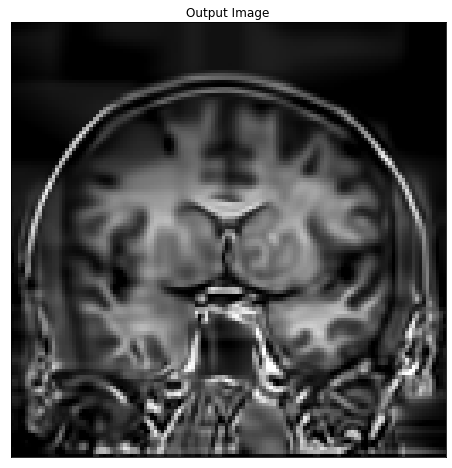

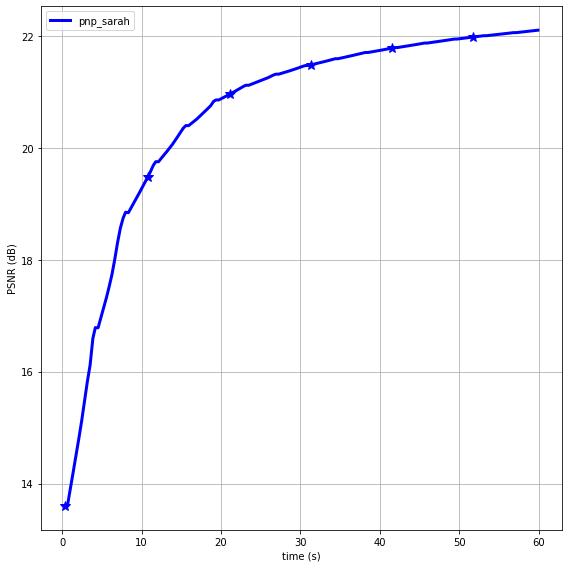

In [16]:
master_psnr_fig = display_results(main_problem, results_sarah, save_results=True)

# Figure 2(a): Compare PSNR over time using NLM

## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images